In [1]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import spacy
# import wordcloud
# import en_core_web_sm
# nlp = spacy.load('en_core_web_sm')
# from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import os
abspath = os.path.abspath('D:/Box Sync/editorials/scripts/')
os.chdir(abspath)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)

import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh

print("done")

done


In [2]:
# full_advice = "../data/genre_advice_full_021520.jl"
full_filename = "../data/by_article_fulltext_020920.jl"
frequency_filename = "../data/frequency_wordlex.csv"

# categories = [
#         # "ctscinet", # no defined genre
#         "career_related_policy",
#         "working_life",
#         "career_profiles",
#         # "life_and_career_balance",# no defined genre
#         # "myscinet", # no defined genre
#         # "issues_and_perspectives", # too much overlap with advice, no defined genre
#         "advice"
#         ]


# get full text dataset as a df
# advice_df = imp.init_df(full_advice, "full", genre="advice")
# advice_df = advice_df[advice_df["year"]<2020]
full_df = imp.init_df(full_filename, "full")
full_df = full_df[full_df["year"]<2020]
# full_df["probnews"] = np.where(
#         (full_df["advice"] == "no") & (full_df["one_time"] == "no"),
#         "yes",
#         "no",
#     )

print("done")

done


In [3]:
frequency_filename = "../data/frequency_wordlex.csv"

frequency = pd.read_csv(frequency_filename)
frequency[:5]

,still,FREQcount,CDcount,FREQlow,Cdlow,SUBTLWF,Lg10WF,SUBTLCD,Lg10CD
0,the,1501908,8388,1339811,8388,29449.18,6.1766,100.00,3.9237
1,to,1156570,8383,1138435,8380,22677.84,6.0632,99.94,3.9235
2,a,1041179,8382,976941,8380,20415.27,6.0175,99.93,3.9234
3,you,2134713,8381,1595028,8376,41857.12,6.3293,99.92,3.9233
4,and,682780,8379,515365,8374,13387.84,5.8343,99.89,3.9232


In [4]:
full_df = full_df.drop(
    [
        "date",
        "time",
        "date_seq",
        "column1",
        "column2",
        "one_time",
        "working_life",
        "career_related_policy",
        "career_profiles",
        "bio",
    ],
    axis=1,
)

full_df.head()

,id,headline,tags,authors,text,month_seq,year,advice,author,n_posts_author,category
0,5839,how to write a winning résumé,"[tooling up, advice, graduate, academic, industry, americas, united states]",peter fiske,"bywelcome to ""tooling up,"" a monthly column about job hunting and career development for scienti...",10,1996,yes,peter fiske,59,advice
1,5835,the commandments of cover letter creation,"[tooling up, advice, americas]",peter fiske,"by've always hated the term ""cover letter."" it implies that the letter you send out to accompany...",12,1996,yes,peter fiske,59,advice
2,5840,dressing scientists for success: male case study,"[tooling up, advice, graduate, postdoc, academic, industry, americas]",peter fiske,"bye all know that, with respect to fashion, the world holds a rather dim view of scientists like...",21,1997,yes,peter fiske,59,advice
3,5841,the tooling up book club: on the market,"[tooling up, advice, graduate, postdoc, academic, americas]",peter fiske,"byow that the holiday season is over, you have returned to your regular life, in the lab, in sch...",25,1998,yes,peter fiske,59,advice
4,5847,self-assessment exercises: a gre for your ego and superego,"[tooling up, advice, early career, graduate, midcareer, postdoc, undergraduate, academic, govern...",peter fiske,by--miguel de cervantesany young scientists who explore nontraditional careers are seeking more ...,26,1998,yes,peter fiske,59,advice


In [5]:
text_clean = []

for i in range(len(full_df)):
    text = full_df.iloc[i]["text"][2:]
    text = clh.no_punctuation(text, quotes=False, frequency_prep=True)
    text_clean.append(text)

full_df["text"]=text_clean

first do regular text frequency

In [9]:
stops = stopwords.words('english')
stops_dict = {}
for word in stops:
    stops_dict[word]=""

text_clean = []

for i in range(len(full_df)):
    text = full_df.iloc[i]["text"][2:]
    # print(text)
    text = clh.remove_stopword(text, stops_dict, extras=extra_stops)
    # print(text)
    text_clean.append(text)

full_df["text_stopped"]=text_clean

full_df["text_stopped"][30]

'want go job fair  looked computer  labmate  dave  standing doorway office armful stuff  highlighter pens  post-it notes  foam balls  pencils  multicolored plastic slinky  asked office supply closet hed raided  corrected  got job fair  going today--you check  never know  might actually atoo  final year graduate school  graduate students  total state denial job hunt  fingers crossed one handful postdoc applications submitted pan  found wondering career outside research better match  check job fair  least might end something useful  ballpoint pen clean t-shirt went   dave  came back armful stuff--but much else  certainly job  didnt learn much either  hadnt developed strategy making opportunity tooling columns  dave jensen stressed importance   researching job opportunities  job fairs valuable part information gathering process  however  job search-related activities  attending job fair either great investment spectacular waste depending goals  preparation  strategy job fairs anyway job f

In [88]:
def add_to_freq_dict(text, word_dict, lemm=False):
    text = " ".join(text.split())
    for word in text.split(" "):
        if lemm==True:
            word = lemmatize_word(word)
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return(word_dict)

def lemmatize_word(word):
    word = lemmatizer.lemmatize(word)
    weird_plurals = {"postdocs":"postdoc","students":"student","scientists":"scientist","says":"say"}
    if word in weird_plurals:
        word = weird_plurals[word]
    return(word)

In [48]:
extra_stops = ["also","new","time","many","would","get","may","like","first","u"]
word_dict = {}

for i in range(len(full_df)):
    text = full_df.iloc[i]["text_stopped"]
    # print(text)
    text = add_to_freq_dict(text, word_dict, lemm=True)
    # print(text)

# print([(key, word_dict[key]) for key in word_dict][:10])

In [101]:
# Create a list of tuples sorted by index 1 i.e. value field     
def dict_to_top(word_dict, n):
    listofTuples = sorted(word_dict.items() ,reverse=True,  key=lambda x: x[1])
    top = {"word":[], "freq":[]}
    rank_dict = {}
    count=0

    # Iterate over the sorted sequence
    for elem in listofTuples :
        if count >n:
            break
        # print(elem[0] , " ::" , elem[1] )
        top["word"].append(elem[0])
        top["freq"].append(elem[1])
        count+=1

    return(top)
top = dict_to_top(word_dict, 40)

<BarContainer object of 41 artists>

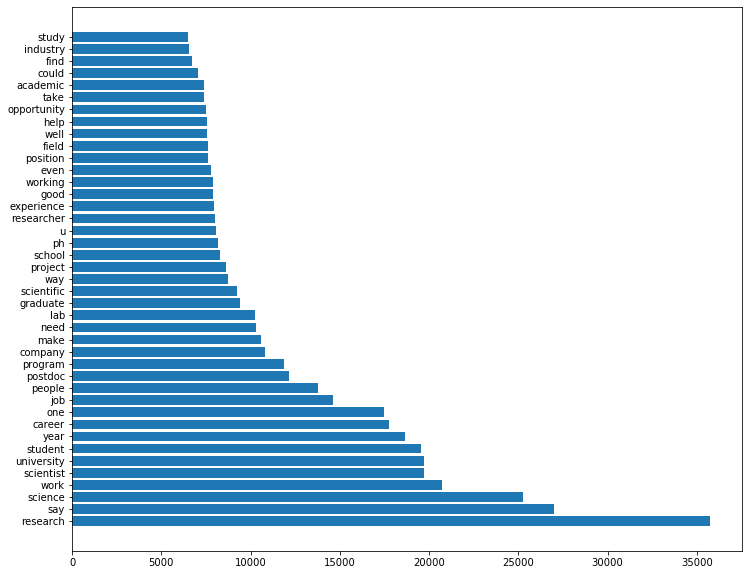

In [47]:
plt.figure(figsize=(12, 10))
plt.barh(top["word"],top["freq"])
# plt.invert_yaxis()

In [64]:

def freq_workflow(df, n_facets, extras, lemm=False):
    stops = stopwords.words('english')
    interval = int(24/n_facets)
    stops_dict = {}
    facets = {}

    for word in stops:
        stops_dict[word]=""

    for i in range(n_facets):
        start = i*interval+1996
        end = start+interval
        facets[start] = df[(df.year<=start) | (df.year <end)]
    
    for key in facets:

        text_list = facets[key]["text"]

        word_dict = {}
        text_clean = []

        for text in text_list:
            text = clh.remove_stopword(text, stops_dict, extras=extra_stops)
            text = add_to_freq_dict(text, word_dict, lemm=lemm)

        top = dict_to_top(word_dict, 40)
        plt.figure(figsize=(12, 10))
        plt.barh(top["word"],top["freq"])
    

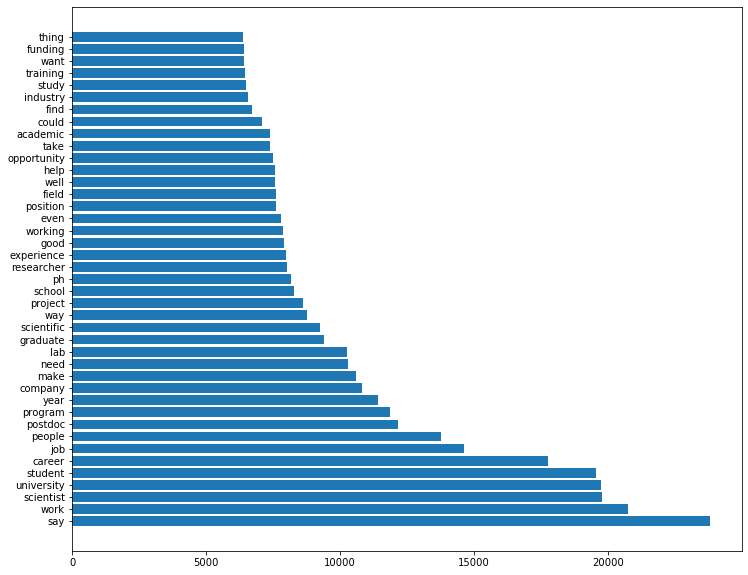

In [107]:
extra_stops = ["also","new","time","many","would","get","may","like","first","u","science","research","say","one","year","say",""]

freq_workflow(df=full_df, n_facets=1,extras=extra_stops, lemm=True)

redo these based on the proportions of the words over the proportion for all words 

In [103]:
text_list = full_df["text"]
word_dict = {}

for text in text_list:
    text = clh.remove_stopword(text, stops_dict, extras=extra_stops)
    text = add_to_freq_dict(text, word_dict, lemm=True)

In [104]:
total = sum(word_dict.values())
word_prop = {}

for key in word_dict:
    prop = word_dict[key]/total
    word_prop[key] = prop

In [93]:
def comp_prop_workflow(df, n_facets, extras, total, prop_dict, lemm=False):
    stops = stopwords.words('english')
    interval = int(24/n_facets)
    stops_dict = {}
    facets = {}

    for word in stops:
        stops_dict[word]=""

    for i in range(n_facets):
        start = i*interval+1996
        end = start+interval
        facets[start] = df[(df.year<=start) | (df.year <end)]
    
    for key in facets:

        text_list = facets[key]["text"]

        word_dict = {}
        prop_dif = {}
        facet_prop = {}
        text_clean = []

        for text in text_list:
            text = clh.remove_stopword(text, stops_dict, extras=extra_stops)
            text = add_to_freq_dict(text, word_dict, lemm=lemm)
        
        facet_total = sum(word_dict.values())/n_facets

        for key in word_dict:
            prop = word_dict[key]/facet_total
            dif = prop_dict[key]-prop
            facet_prop[key]=prop
            prop_dif[key]=dif


        top = dict_to_top(facet_prop, 30)

        plt.figure(figsize=(12, 10))
        plt.barh(top["word"],top["freq"])
    

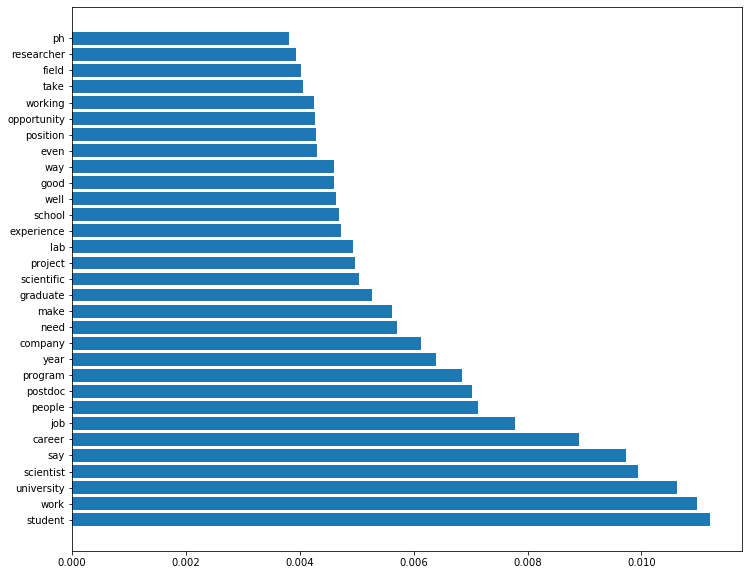

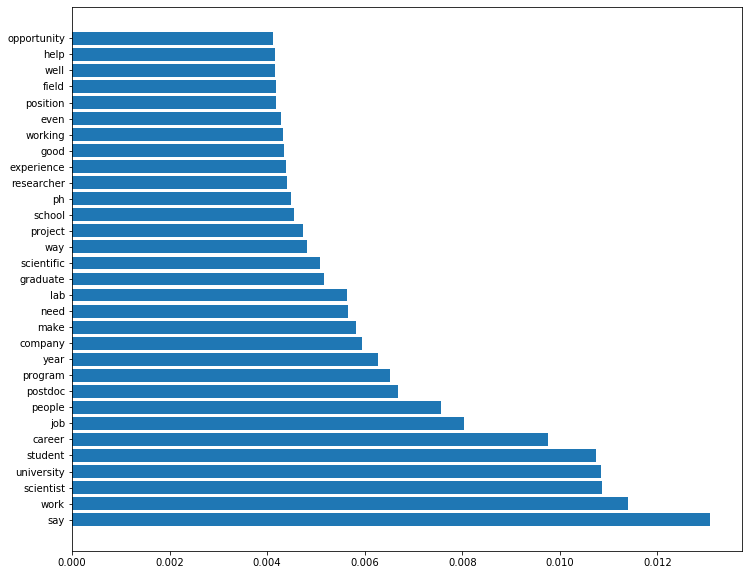

In [102]:
comp_prop_workflow(df=full_df, n_facets=2, extras=extra_stops, total=total, prop_dict=word_prop, lemm=True)

In [106]:
rank_dict = {}
for key in word_dict:
    rank_dict[key]=[]

def word_rank_facets(facet_word_dict, rank_dict):
    listofTuples = sorted(word_dict.items() ,reverse=True,  key=lambda x: x[1])
    top = {"word":[], "freq":[]}

    facet_rank_dict={}

    count=0
    count=1
    for elem in listofTuples:
        facet_rank_dict[elem[0]]=count
        count+=1
    
    for key in rank_dict:
        if key in facet_rank_dict:
            rank_dict[key].append(facet_rank_dict[key])
        else:
            rank_dict.append(len(facet_rank_dict))
    return(rank_dict)


In [124]:
def rank_workflow(df, n_facets, extras, lemm=False):
    stops = stopwords.words('english')
    interval = int(24/n_facets)
    stops_dict = {}
    facets = {}
    rank_dict = {}

    for word in stops:
        stops_dict[word]=""

    for i in range(n_facets):
        start = i*interval+1996
        end = start+interval
        facets[start] = df[(df.year<=start) | (df.year <end)]
    
    for key in facets:

        text_list = facets[key]["text"]

        word_dict = {}
        facet_prop = {}
        text_clean = []

        for text in text_list:
            text = clh.remove_stopword(text, stops_dict, extras=extra_stops)
            text = add_to_freq_dict(text, word_dict, lemm=lemm)
        
        facet_total = sum(word_dict.values())/n_facets

        for key in word_dict:
            # prop = word_dict[key]/facet_total
            # dif = prop_dict[key]-prop
            facet_prop[key]=prop
            # prop_dif[key]=dif

        print(word_rank_facets(facet_prop, rank_dict))

        listofTuples = sorted(facet_prop.items() ,reverse=True,  key=lambda x: x[1])
        top = {"word":[], "rank_dif":[]}
        count=0

        print(rank_dict)

        # if len(rank_dict["student"]>2):
        #     continue
        # Iterate over the sorted sequence

        for elem in listofTuples :
            if count >30:
                break
            # print(elem[0] , " ::" , elem[1] )
            top["word"].append(elem[0])
            top["rank_dif"].append(rank_dict[elem[0]][-2])
            count+=1


        # plt.figure(figsize=(12, 10))
        # plt.barh(top["word"],top["rank_dif"])
    

In [125]:
rank_workflow(df=full_df, n_facets=2, extras=extra_stops, lemm=False)

{}
{}


KeyError: 'welcome'